In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math


    # Load data from the CSV file
df = pd.read_csv('archive\\StudentPerformanceFactors.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
def descriptive_stats(df):
    # Select numerical columns only
    numerical_data = df.select_dtypes(include=[np.number])
    
    # Create a dictionary to store statistics
    stats_dict = {}

    for col in numerical_data.columns:
        col_data = numerical_data[col].dropna()  # Drop NaN values
        
        # Calculate basic statistics using pandas methods for mean, median, std, min, max, percentiles
        mean = col_data.mean()
        median = col_data.median()
        mode = col_data.mode()[0] if not col_data.mode().empty else np.nan
        std_dev = col_data.std()
        variance = col_data.var()
        min_value = col_data.min()
        max_value = col_data.max()
        range_value = max_value - min_value
        percentiles = np.percentile(col_data, [25, 50, 75])
        
        # Using scipy.stats.describe() for additional info like kurtosis and skewness if needed
        scipy_describe = stats.describe(col_data)
        
        # Store all statistics in a dictionary
        stats_dict[col] = {
            'Mean': mean,
            'Median': median,
            'Mode': mode,
            'Standard Deviation': std_dev,
            'Variance': variance,
            'Min': min_value,
            'Max': max_value,
            'Range': range_value,
            '25th Percentile': percentiles[0],
            '50th Percentile (Median)': percentiles[1],
            '75th Percentile': percentiles[2]
        }
    
    # Convert the dictionary to a pandas DataFrame for a clean output
    stats_df = pd.DataFrame(stats_dict).T
    return stats_df


# Get descriptive statistics
stats_summary = descriptive_stats(df)
print("Basic Descriptive Statistics:")
print(stats_summary)


Basic Descriptive Statistics:
                        Mean  Median  Mode  Standard Deviation    Variance  \
Hours_Studied      19.975329    20.0  20.0            5.990594   35.887221   
Attendance         79.977448    80.0  67.0           11.547475  133.344178   
Sleep_Hours         7.029060     7.0   7.0            1.468120    2.155377   
Previous_Scores    75.070531    75.0  66.0           14.399784  207.353789   
Tutoring_Sessions   1.493719     1.0   1.0            1.230570    1.514304   
Physical_Activity   2.967610     3.0   3.0            1.031231    1.063438   
Exam_Score         67.235659    67.0  68.0            3.890456   15.135646   

                    Min    Max  Range  25th Percentile  \
Hours_Studied       1.0   44.0   43.0             16.0   
Attendance         60.0  100.0   40.0             70.0   
Sleep_Hours         4.0   10.0    6.0              6.0   
Previous_Scores    50.0  100.0   50.0             63.0   
Tutoring_Sessions   0.0    8.0    8.0              1.0 

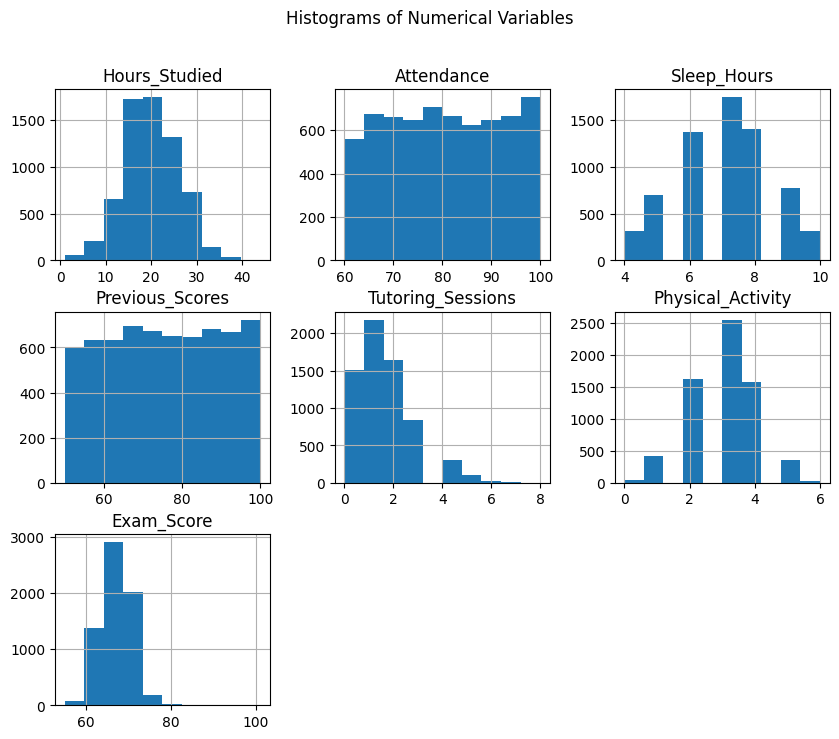

<Figure size 1500x1500 with 0 Axes>

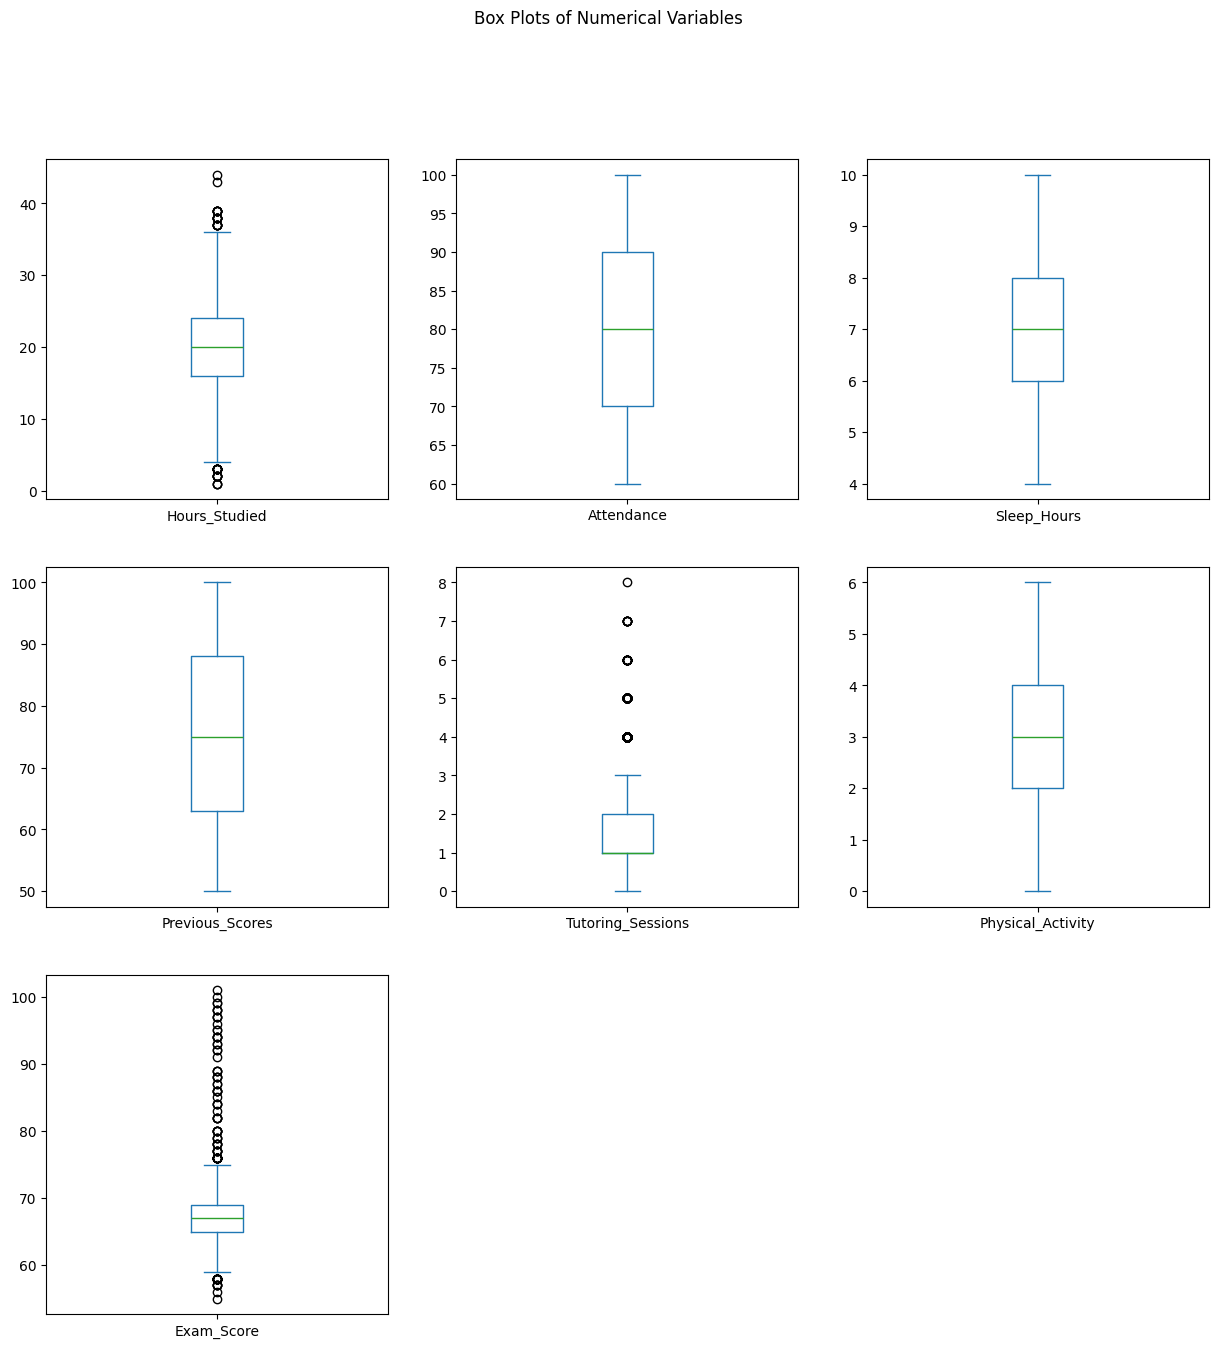

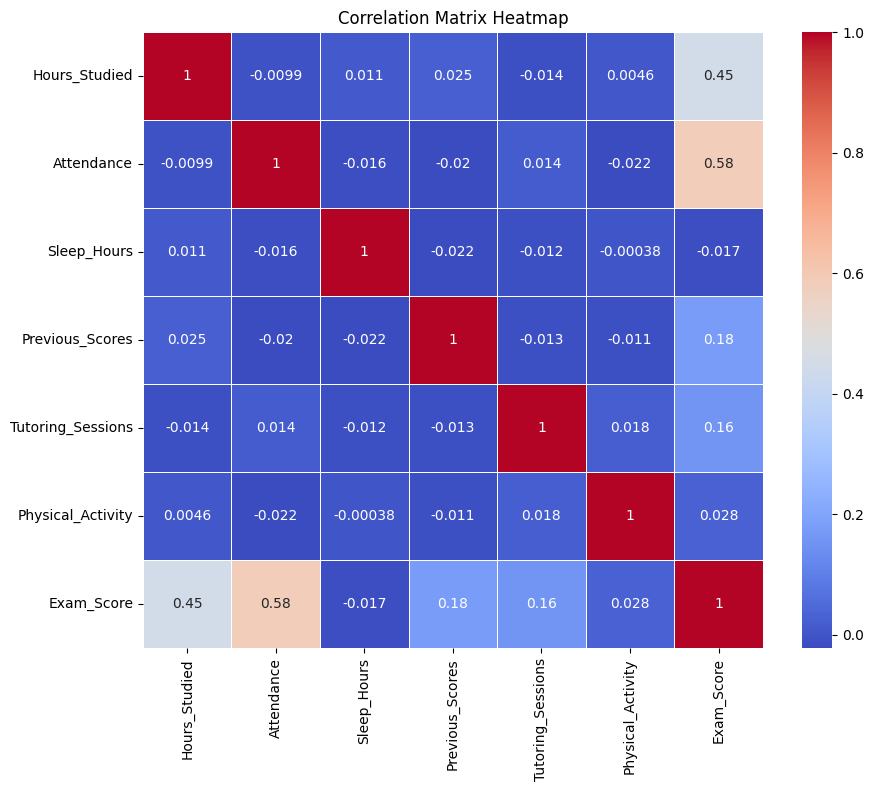

In [5]:
# VISUALIZATION

def plot_histograms(df):
    # Plot histograms for numerical columns
    numerical_data = df.select_dtypes(include=[np.number])
    numerical_data.hist(bins=10, figsize=(10, 8))
    plt.suptitle('Histograms of Numerical Variables')
    plt.show()

def plot_boxplots(df):
    # Plot box plots for numerical columns
    numerical_data = df.select_dtypes(include=[np.number])
    
    # Calculate the number of rows and columns needed for the layout
    num_columns = len(numerical_data.columns)
    num_rows = math.ceil(num_columns / 3)  # Use 3 columns per row
    plt.figure(figsize=(15, num_rows * 5))
    numerical_data.plot(kind='box', subplots=True, layout=(num_rows, 3), figsize=(15, num_rows * 5), sharex=False, sharey=False)
    
    plt.suptitle('Box Plots of Numerical Variables')
    plt.show()

def plot_correlation_matrix(df):
    # Plot correlation heatmap
    numerical_data = df.select_dtypes(include=[np.number])
    corr_matrix = numerical_data.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Plot visual representations
plot_histograms(df)
plot_boxplots(df)
plot_correlation_matrix(df)

# Introduction

The dataset under analysis, StudentPerformanceFactors.csv, is sourced from an archive and contains various factors affecting student performance. This dataset is expected to include multiple numerical attributes related to student metrics such as grades, study hours, or other performance indicators.

## Key Statistics

The following key statistics were computed for each numerical attribute in the dataset:

- Mean: The average value of the attribute.
- Median: The middle value when the data is ordered.
- Mode: The most frequently occurring value.
- Standard Deviation: A measure of the amount of variation or dispersion in the attribute.
- Variance: The average of the squared differences from the mean.
- Min: The smallest value in the attribute.
- Max: The largest value in the attribute.
- Range: The difference between the maximum and minimum values.
- 25th Percentile: The value below which 25% of the data falls.
- 50th Percentile (Median): The value below which 50% of the data falls.
- 75th Percentile: The value below which 75% of the data falls.

These statistics provide a comprehensive summary of the central tendency, spread, and distribution of the data attributes.

# Insights from Descriptive Statistics

1. Central Tendency:

    - Mean vs. Median: A significant difference between the mean and median in some attributes indicates skewness. For example, if the mean is higher than the median, the data might be right-skewed (positive skew).

2. Dispersion:

    - Standard Deviation and Variance: High values suggest a wide spread in the data, meaning attributes have considerable variability.
Range: The range provides an indication of the spread between the smallest and largest values. A large range might suggest significant differences within the data.

3. Percentiles:

    - The 25th, 50th, and 75th percentiles help to understand the distribution of data. A small difference between the 25th and 75th percentiles indicates that the data is tightly clustered around the median.

4. Mode:

    - The mode can indicate the most common value, which can be useful for identifying the most frequent performance levels or conditions.

5. Outliers:

    - Identifying extreme values that are significantly different from the rest of the data can point out potential outliers. These could be errors or genuine values that need further investigation.

# Visualizations and Interpretations

1. Histograms:

    - Histograms for numerical variables reveal the distribution of each attribute. For instance, attributes with bell-shaped histograms suggest normal distribution, while skewed histograms indicate non-normal distribution.

2. Box Plots:

    - Box plots provide a visual summary of the median, quartiles, and potential outliers. Attributes with long whiskers or numerous outliers may require further scrutiny to understand unusual data points.

3. Correlation Matrix Heatmap:

    - The correlation heatmap displays the relationships between attributes. High correlation values (close to 1 or -1) suggest a strong relationship between pairs of attributes, which can be critical for understanding how factors influence each other.

# Conclusion

The dataset provides a range of numerical attributes related to student performance. The descriptive statistics and visualizations offer insights into the central tendencies, variabilities, and relationships within the data. Key findings include the presence of skewness, variability in attributes, and potential outliers. The correlation matrix highlights significant relationships between factors, which can be useful for further analysis.

### Next Steps:

1. Detailed Analysis: Investigate skewed attributes and outliers in more depth.
2. Correlation Analysis: Explore the implications of strong correlations between attributes for predictive modeling.
3. Further Visualization: Consider additional plots, such as pair plots or 3D scatter plots, to visualize interactions between multiple attributes.
4. Predictive Modeling: Build and evaluate models to predict student performance based on the identified factors.